In [17]:
include("PVCR.jl");

In [18]:
CNFL_CB= CSV.read("data/CNFL_CB.csv");
using Query

# Current Tariff System

# Impact of residential Consumers adopting rooftop PV systems.

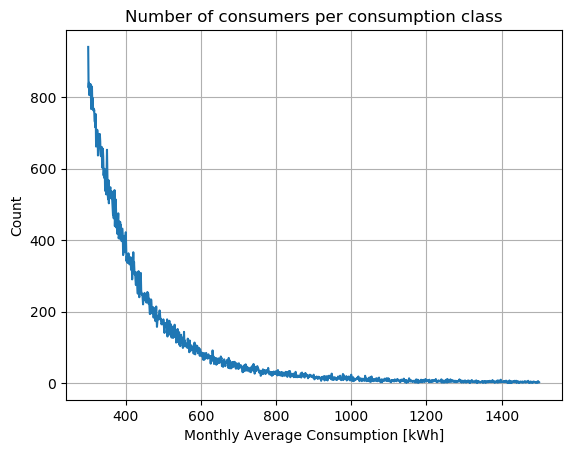

In [176]:
CNFL_res = @from i in CNFL_CB begin 
    @where (i.Consumo >= 300 && i.Consumo <= 1500)
    @select {i.Consumo, i.TRE} 
    @collect DataFrame
    end;
plot(CNFL_res[:Consumo], CNFL_res[:TRE]);
title("Number of consumers per consumption class")
xlabel("Monthly Average Consumption [kWh]")
ylabel("Count")
grid("on");

In [95]:
ui_res = []
ui_data_res = Dict{Int64,Any}()

for i in 1:size(CNFL_res,1)
    Result = Dict{String,Any}()
    residential.econsumption = CNFL_res[:Consumo][i]; get_pmax(residential);
    res = optimal_pv(residential, PVRes, 0.0:0.5:15, BAC1, tariff_increase = true)
    res[1][2] < 0.5 ? break : true 
    PVRes_opt = deepcopy(PVRes) 
    PVRes_opt.capacity = res[1][2]
    Result["optimal"] = res[1][2]
    Result["Impact"] = PV_losses(residential, PVRes_opt, SD)*CNFL_res[:TRE][i];
    ui_data_res[CNFL_res[:Consumo][i]] = Result  
end

In [169]:
cumulative_impact_res = [sum(ui_data_res[i]["Impact"])./1e6 for i in CNFL_res[:Consumo]];
println("Total Losses Over 10 years", " ", sum(cumulative_impact_res), " Million Colones")

Total Losses Over 10 years -813628.1234845463 Million Colones


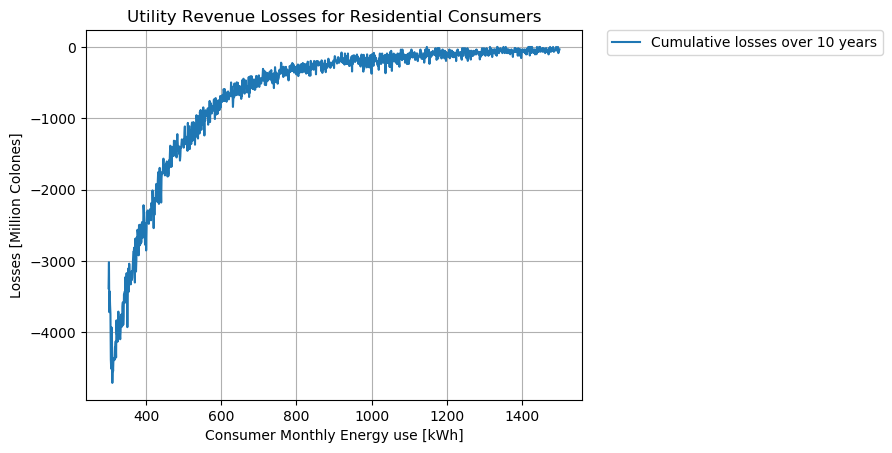

In [97]:
plot(CNFL_res[:Consumo], cumulative_impact_res, label = "Cumulative losses over 10 years")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
ylabel("Losses [Million Colones]")
xlabel("Consumer Monthly Energy use [kWh]")
title("Utility Revenue Losses for Residential Consumers")
grid("on");

# Impact From Commercial - Industrial Consumers adopting optimal Rooftop PV

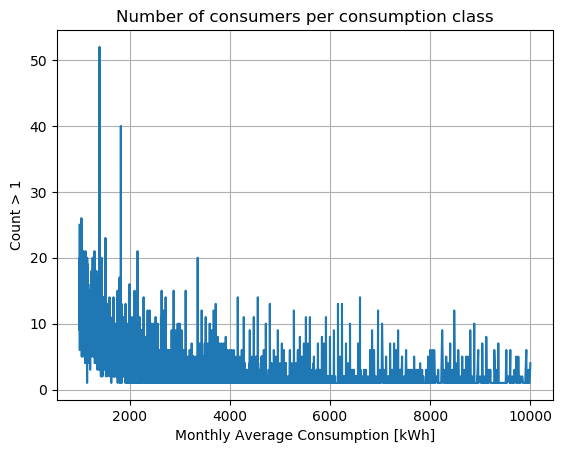

In [181]:
CNFL_gen = @from i in CNFL_CB begin 
    @where (i.Consumo >= 1000 && i.Consumo <= 10000)
    @select {i.Consumo, i.TCO, i.TIN} 
    @collect DataFrame
end
CNFL_gen[:TGEN] = CNFL_gen[:TCO] + CNFL_gen[:TIN];
CNFL_gen = CNFL_gen[CNFL_gen.TGEN .> 0, :]
plot(CNFL_gen[:Consumo], CNFL_gen[:TGEN]);
title("Number of consumers per consumption class")
xlabel("Monthly Average Consumption [kWh]")
ylabel("Count > 1");
grid("on");

In [182]:
ui_comind = []
ui_data_comind = Dict{Int64,Any}()
for i in 1:size(CNFL_gen,1)
    Result = Dict{String,Any}()
    commercial.econsumption = CNFL_gen[:Consumo][i]; get_pmax(commercial);
    res = optimal_pv(commercial, PVComInd, 0.0:1:100, BAC1, tariff_increase = true)
    res[1][2] < 0.5 ? continue : true 
    PVComInd_opt = deepcopy(PVComInd) 
    PVComInd_opt.capacity = res[1][2]
    Result["optimal"] = res[1][2]
    Result["Impact"] = PV_losses(commercial, PVComInd_opt, SD)*CNFL_gen[:TGEN][i];
    ui_data_comind[i] = Result  
end

In [183]:
cumulative_impact_comind = [sum(ui_data_comind[i]["Impact"])./1e6 for i in 1:size(CNFL_gen,1)];
println("Total Losses Over 10 years", " ", sum(cumulative_impact_comind), " Million Colones")

Total Losses Over 10 years -409181.4735230608 Million Colones


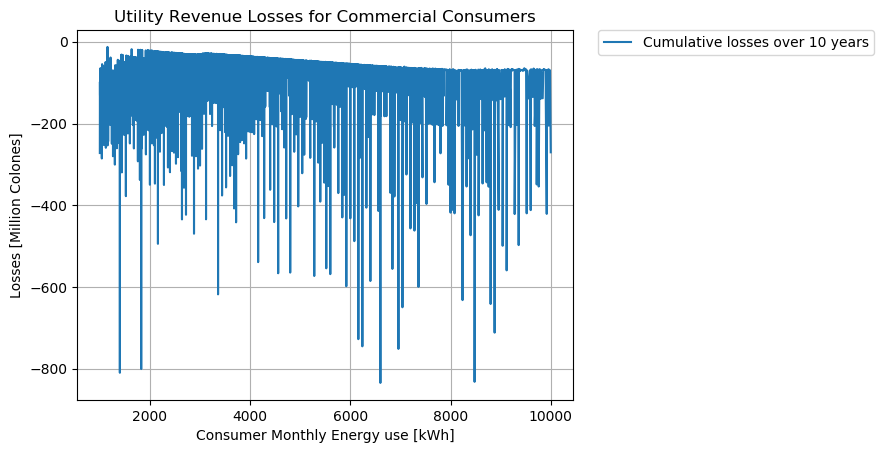

In [184]:
plot(CNFL_gen[:Consumo], cumulative_impact_comind, label = "Cumulative losses over 10 years")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
ylabel("Losses [Million Colones]")
xlabel("Consumer Monthly Energy use [kWh]")
title("Utility Revenue Losses for Commercial Consumers")
grid("on");

# Impact of Medium Voltage Consumers adopting rooftop PV systems. 

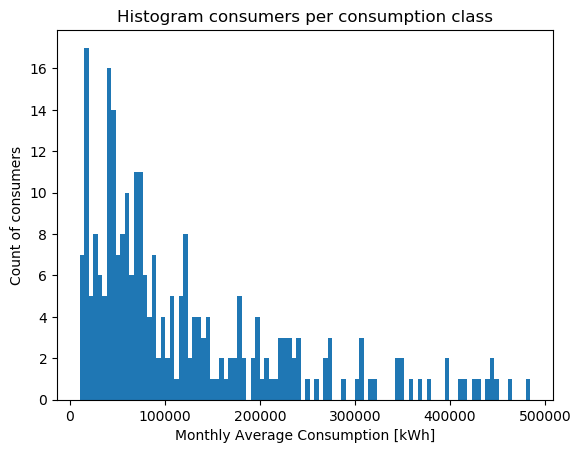

PyObject Text(24.000000000000007, 0.5, 'Count of consumers')

In [179]:
CNFL_TMT = @from i in CNFL_CB begin 
    @where (i.Consumo >= 10000 && i.TMT > 0)
    @select {i.Consumo, i.TMT} 
    @collect DataFrame
    end;
CNFL_TMT = CNFL_TMT[CNFL_TMT.TMT .> 0, :]
b= hist(CNFL_TMT[CNFL_TMT.Consumo .< 500000, :Consumo], bins = 100);
title("Histogram consumers per consumption class")
xlabel("Monthly Average Consumption [kWh]")
ylabel("Count of consumers")

In [170]:
ui_tmt = []
ui_data_tmt = Dict{Int64,Any}()
for i in 1:size(CNFL_TMT,1)
    Result = Dict{String,Any}()
    mediumvoltage.econsumption = CNFL_TMT[:Consumo][i]; get_pmax(mediumvoltage);
    res = optimal_pv(mediumvoltage, PVTMT, 0.0:1:400, BAC1, tariff_increase = true)
    res[1][2] < 0.5 ? continue : true 
    PVTMT_opt = deepcopy(PVTMT) 
    PVTMT_opt.capacity = res[1][2]
    Result["optimal"] = res[1][2]
    Result["Impact"] = PV_losses(mediumvoltage, PVTMT_opt, SD)*CNFL_TMT[:TMT][i];
    ui_data_tmt[i] = Result  
end

In [180]:
cumulative_impact_tmt = [sum(ui_data_tmt[i]["Impact"])./1e6 for i in 1:size(CNFL_TMT,1)];
println("Total Losses Over 10 years", " ", sum(cumulative_impact_tmt), " Million Colones")

Total Losses Over 10 years -19503.285508413854 Million Colones


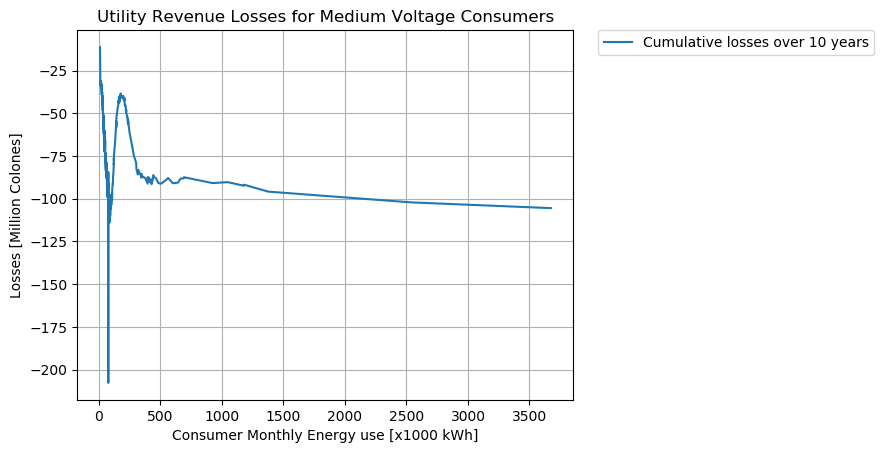

In [175]:
plot(CNFL_TMT[:Consumo]./1e3, cumulative_impact_tmt, label = "Cumulative losses over 10 years")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
ylabel("Losses [Million Colones]")
xlabel("Consumer Monthly Energy use [x1000 kWh]")
title("Utility Revenue Losses for Medium Voltage Consumers")
grid("on");

# New Tariff System

# Impact From Commercial - Industrial Consumers adopting optimal Rooftop PV

In [ ]:
commercial.tariff = A_CI_CNFL
alt_ui_comind = []
alt_ui_data_comind = Dict{Int64,Any}()
for i in 1:size(CNFL_gen,1)
    Result = Dict{String,Any}()
    commercial.econsumption = CNFL_gen[:Consumo][i]; get_pmax(commercial);
    res = optimal_pv(commercial, PVComInd, 0.0:1:100, BAC1, tariff_increase = true)
    res[1][2] < 0.5 ? continue : true 
    PVComInd_opt = deepcopy(PVComInd) 
    PVComInd_opt.capacity = res[1][2]
    Result["optimal"] = res[1][2]
    Result["Impact"] = PV_losses(commercial, PVComInd_opt, SD)*CNFL_gen[:TGEN][i];
    alt_ui_data_comind[i] = Result  
end

In [ ]:
alt_cumulative_impact_comind = [sum(alt_ui_data_comind[i]["Impact"])./1e6 for i in 1:size(CNFL_gen,1)];
println("Total Losses Over 10 years", " ", sum(alt_cumulative_impact_comind), " Million Colones")

In [ ]:
plot(CNFL_gen[:Consumo], alt_cumulative_impact_comind, label = "Cumulative losses over 10 years")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
ylabel("Losses [Million Colones]")
xlabel("Consumer Monthly Energy use [kWh]")
title("Utility Revenue Losses for Commercial Consumers - Alternative Tariff System")
grid("on");

In [ ]:
savefig("com-alt.svg")

# Impact of Medium Voltage Consumers adopting rooftop PV systems. 

In [ ]:
mediumvoltage.tariff = A_TMT_CNFL
alt_ui_tmt = []
alt_ui_data_tmt = Dict{Int64,Any}()
for i in 1:size(CNFL_TMT,1)
    Result = Dict{String,Any}()
    mediumvoltage.econsumption = CNFL_TMT[:Consumo][i]; get_pmax(mediumvoltage);
    res = optimal_pv(mediumvoltage, PVTMT, 0.0:1:400, BAC1, tariff_increase = true)
    res[1][2] < 0.5 ? continue : true 
    PVTMT_opt = deepcopy(PVTMT) 
    PVTMT_opt.capacity = res[1][2]
    Result["optimal"] = res[1][2]
    Result["Impact"] = PV_losses(mediumvoltage, PVTMT_opt, SD)*CNFL_TMT[:TMT][i];
    ui_data_tmt[i] = Result  
end

In [ ]:
cumulative_impact_tmt = [sum(alt_ui_data_tmt[i]["Impact"])./1e6 for i in 1:size(CNFL_TMT,1)];
println("Total Losses Over 10 years", " ", sum(alt_cumulative_impact_tmt), " Million Colones")

In [ ]:
plot(CNFL_TMT[:Consumo]./1e3, alt_cumulative_impact_tmt, label = "Cumulative losses over 10 years")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
ylabel("Losses [Million Colones]")
xlabel("Consumer Monthly Energy use [x1000 kWh]")
title("Utility Revenue Losses for Medium Voltage Consumers - Alternative Tariff System")
grid("on");

In [ ]:
savefig("tmt-alt.svg")